# Test

In [1]:
# hybrid-algorithms based on data assumptions: linearity or non-linearity
from cadimulc.hybrid_algorithms import MLCLiNGAM, NonlinearMLC

In [2]:
from cadimulc.utils.visualization import draw_graph_from_ndarray
import matplotlib.pyplot as plt

In [3]:
import numpy as np

# Fine-tune the data generation by scaling.
def scaling(variable, scale):
    return variable * scale

np.random.seed(42)
sample = 2000

# Simulate the data generation with non-linear functional relations.
c = np.random.normal(size=sample) 
u = scaling(np.cos(c), 1) + scaling(np.random.normal(size=sample), 0.1)
e = scaling(np.sin(c), 1) + np.sin(u) + scaling(np.random.normal(size=sample), 0.1)

dataset_a_without_confounding = np.array([c, e, u]).T

In [4]:
nonlinear_mlc = NonlinearMLC()

In [5]:
nonlinear_mlc.fit(dataset=dataset_a_without_confounding)

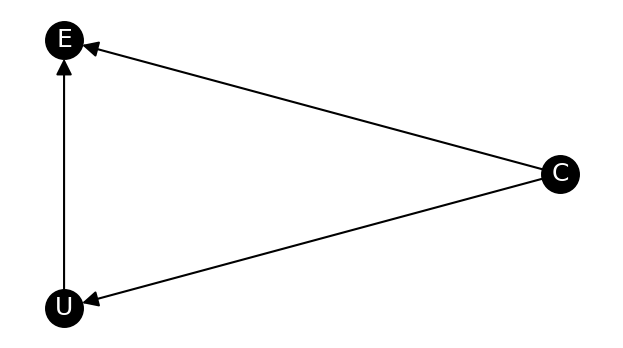

In [6]:
array = nonlinear_mlc.adjacency_matrix_
draw_graph_from_ndarray(
    array=array, 
    # Rename the graph nodes to consist with the data column.
    rename_nodes=['C', 'E', 'U']   
)
plt.show()

In [7]:
np.random.seed(42)

# Add an unobserved parent variable. 
pa_c = np.random.normal(size=sample)

# Simulate latent confounding to the data generation.
c = np.random.normal(size=sample) + scaling(pa_c, 0.5)
u = scaling(np.cos(c), 1) + scaling(np.random.normal(size=sample), 0.1) + scaling(pa_c, 0.5)
e = scaling(np.sin(c), 1) + np.sin(u) + scaling(np.random.normal(size=sample), 0.1)

dataset_a_with_confounding = np.array([c, e, u]).T

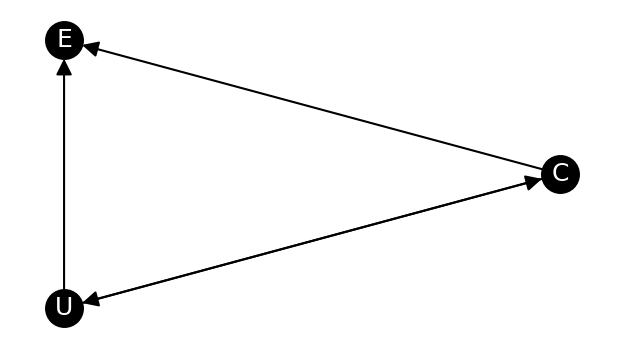

In [8]:
nonlinear_mlc.fit(dataset=dataset_a_with_confounding)

draw_graph_from_ndarray(
    array=nonlinear_mlc.adjacency_matrix_, 
    rename_nodes=['C', 'E', 'U']   
)
plt.show()

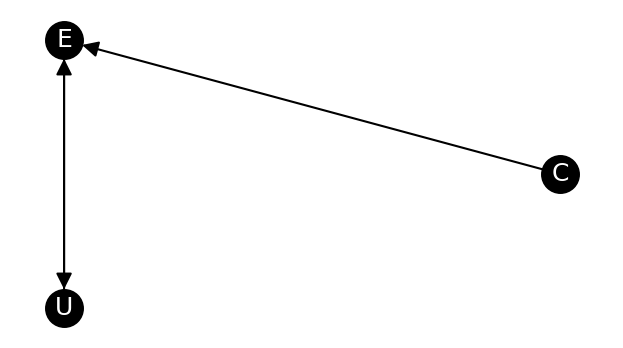

In [9]:
np.random.seed(42)

pa_e = np.random.normal(size=sample) 

c = np.random.normal(size=sample) 
u = scaling(np.cos(c), 10) + scaling(np.random.normal(size=sample), 0.1) + scaling(pa_e, 0.5)
e = scaling(np.sin(c), 10) + np.sin(u) + scaling(np.random.normal(size=sample), 0.1) + scaling(pa_e, 10)

dataset_b_with_confounding = np.array([c, e, u]).T

nonlinear_mlc.fit(dataset=dataset_b_with_confounding)

draw_graph_from_ndarray(
    array=nonlinear_mlc.adjacency_matrix_, 
    rename_nodes=['C', 'E', 'U']   
)
plt.show()

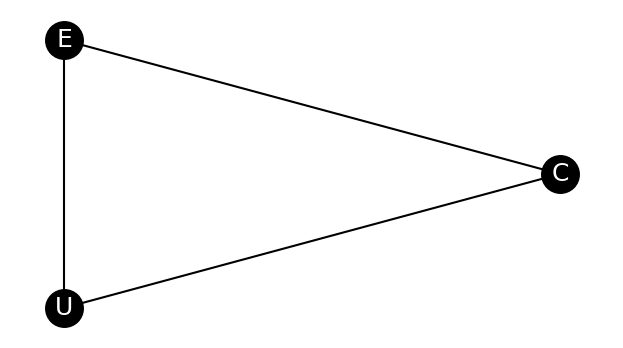

In [11]:
np.random.seed(42)

pa_e = np.random.normal(size=sample) 

u = scaling(np.random.normal(size=sample), 0.1) + scaling(pa_e, 0.5)
c = np.random.normal(size=sample) + scaling(np.cos(u), 10)
e = scaling(np.sin(c), 10) + np.sin(u) + scaling(np.random.normal(size=sample), 0.1) + scaling(pa_e, 10)

dataset_c_with_confounding = np.array([c, e, u]).T

nonlinear_mlc.fit(dataset=dataset_c_with_confounding)

draw_graph_from_ndarray(
    array=nonlinear_mlc.adjacency_matrix_, 
    rename_nodes=['C', 'E', 'U'],
    save_fig=True,
    saving_path='c_with_confounding'
)
plt.show()